In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
import os
warnings.filterwarnings("ignore")

wd = "C:/Users/lenwy/scm"
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/SCM/CNC-Milling Machine_Production data.xlsx")

In [ ]:
df

,start_time,end_time,processing_time,average_power_consumption,number_of_missing_datapoints,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
0,1649055030,1649055950,920,2.358227e+16,0,136659600,5809,5,11,6,7.943872e+16,1.589407e+16,4343264812575575,4010019001554673,3977633442736224,1.197150e+16,3.678871e+16
1,1649056780,1649057100,320,2.538088e+07,0,136659600,462,4,13,7,7.865567e+16,1.148869e+15,28009049773755656,4208144796380091,28494117647058824,5.610370e+15,1.829434e+14
2,1649237400,1649237800,400,2.618128e+16,10,420000,234,2,5,3,7.269292e+15,1.212617e+16,5289719626168225,4107476635514018,1584158878504673,7.263716e+15,2.042870e+16
3,1649243450,1649243800,350,3.386403e+15,0,420000,234,2,5,3,7.269292e+15,1.212617e+16,5289719626168225,4107476635514018,1584158878504673,7.263716e+15,2.042870e+16
4,1649243850,1649244200,350,3.306637e+15,0,420000,234,2,5,3,7.269292e+15,1.212617e+16,5289719626168225,4107476635514018,1584158878504673,7.263716e+15,2.042870e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1657167310,1657167500,190,2.410263e+16,0,136659600,150,3,7,4,8.000393e+15,1.513846e+16,39707692307692304,47846153846153848,38046153846153848,8.923077e+15,3.310606e+16
216,1657167620,1657167800,180,2.666306e+16,0,136659600,150,3,7,4,8.000393e+15,1.513846e+16,39707692307692304,47846153846153848,38046153846153848,8.923077e+15,3.310606e+16
217,1657167950,1657168130,180,2.558339e+15,0,136659600,150,3,7,4,8.000393e+15,1.513846e+16,39707692307692304,47846153846153848,38046153846153848,8.923077e+15,3.310606e+16
218,1657168460,1657168850,390,2.684590e+16,0,136659600,526,7,15,8,8.016446e+15,9.254704e+15,1990909090909091,432806324110672,22990513833992096,5.079051e+14,1.554875e+16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   start_time                                                 220 non-null    int64  
 1   end_time                                                   220 non-null    int64  
 2   processing_time                                            220 non-null    int64  
 3   average_power_consumption                                  220 non-null    float64
 4   number_of_missing_datapoints                               220 non-null    int64  
 5   raw_volume                                                 220 non-null    int64  
 6   number_of_lines_of_code                                    220 non-null    int64  
 7   number_tool_changes                                        220 non-null    int64  
 8   number_of_

In [ ]:
df.describe()

,start_time,end_time,processing_time,average_power_consumption,number_of_missing_datapoints,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
count,2.200000e+02,2.200000e+02,220.000000,2.200000e+02,220.000000,2.200000e+02,220.000000,220.000000,220.000000,220.000000,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02
mean,1.654939e+09,1.654940e+09,1022.886364,1.662605e+16,19.272727,8.069418e+07,6895.327273,5.763636,48.781818,24.890909,9.168552e+15,1.110948e+16,1.964992e+16,1.020974e+16,1.211113e+16,1.232763e+16,1.098923e+16
std,2.215448e+06,2.215309e+06,1457.893633,1.396877e+16,33.765484,6.621539e+07,9597.106987,4.731952,72.534971,36.267486,1.029301e+16,5.188261e+15,1.418189e+16,1.395040e+16,1.445534e+16,1.390119e+16,1.048769e+16
min,1.649055e+09,1.649056e+09,100.000000,2.222300e+04,0.000000,2.492280e+05,86.000000,1.000000,3.000000,2.000000,1.098347e+14,8.000000e+01,2.000000e+02,2.000000e+01,4.000000e+02,4.700000e+01,1.829434e+14
25%,1.653306e+09,1.653307e+09,292.500000,2.316632e+15,0.000000,8.751360e+05,313.000000,2.000000,7.000000,4.000000,7.083711e+15,6.201614e+15,5.289720e+15,4.029052e+15,1.664277e+15,5.852345e+15,3.115166e+15
50%,1.656321e+09,1.656321e+09,480.000000,1.945973e+16,0.000000,1.366596e+08,968.500000,4.000000,21.000000,11.000000,7.779717e+15,1.212617e+16,2.229508e+16,4.154639e+15,2.800444e+15,8.155598e+15,4.428094e+15
75%,1.656419e+09,1.656420e+09,912.500000,2.972326e+16,20.000000,1.366596e+08,13447.000000,6.250000,63.000000,32.000000,8.008454e+15,1.550609e+16,2.851920e+16,5.646341e+15,2.117068e+16,1.390764e+16,2.042870e+16
max,1.657169e+09,1.657169e+09,6920.000000,4.229679e+16,210.000000,1.366596e+08,44441.000000,18.000000,263.000000,132.000000,7.943872e+16,1.913700e+16,4.210844e+16,4.894198e+16,3.964043e+16,5.852526e+16,3.678871e+16


In [ ]:
df.nunique().sort_values(ascending=True)

raw_volume                                                     7
number_tool_changes                                           11
number_of_missing_datapoints                                  16
number_of_travels_to_machine_zero_point_in_rapid_traverse     19
number_axis_rotations                                         19
weighted_tool_diameter                                        31
weighted_cutting_speed                                        32
weighted_number_of_cutting_edges                              32
weighted_cutting_length                                       32
weighted_speed                                                33
weighted_feedrate                                             33
number_of_lines_of_code                                       33
weighted_feed_per_tooth                                       33
processing_time                                               86
average_power_consumption                                    220
end_time                 

In [ ]:
df.isnull().sum()

start_time                                                   0
end_time                                                     0
processing_time                                              0
average_power_consumption                                    0
number_of_missing_datapoints                                 0
raw_volume                                                   0
number_of_lines_of_code                                      0
number_tool_changes                                          0
number_of_travels_to_machine_zero_point_in_rapid_traverse    0
number_axis_rotations                                        0
weighted_speed                                               0
weighted_tool_diameter                                       0
weighted_cutting_length                                      0
weighted_number_of_cutting_edges                             0
weighted_cutting_speed                                       0
weighted_feed_per_tooth                                

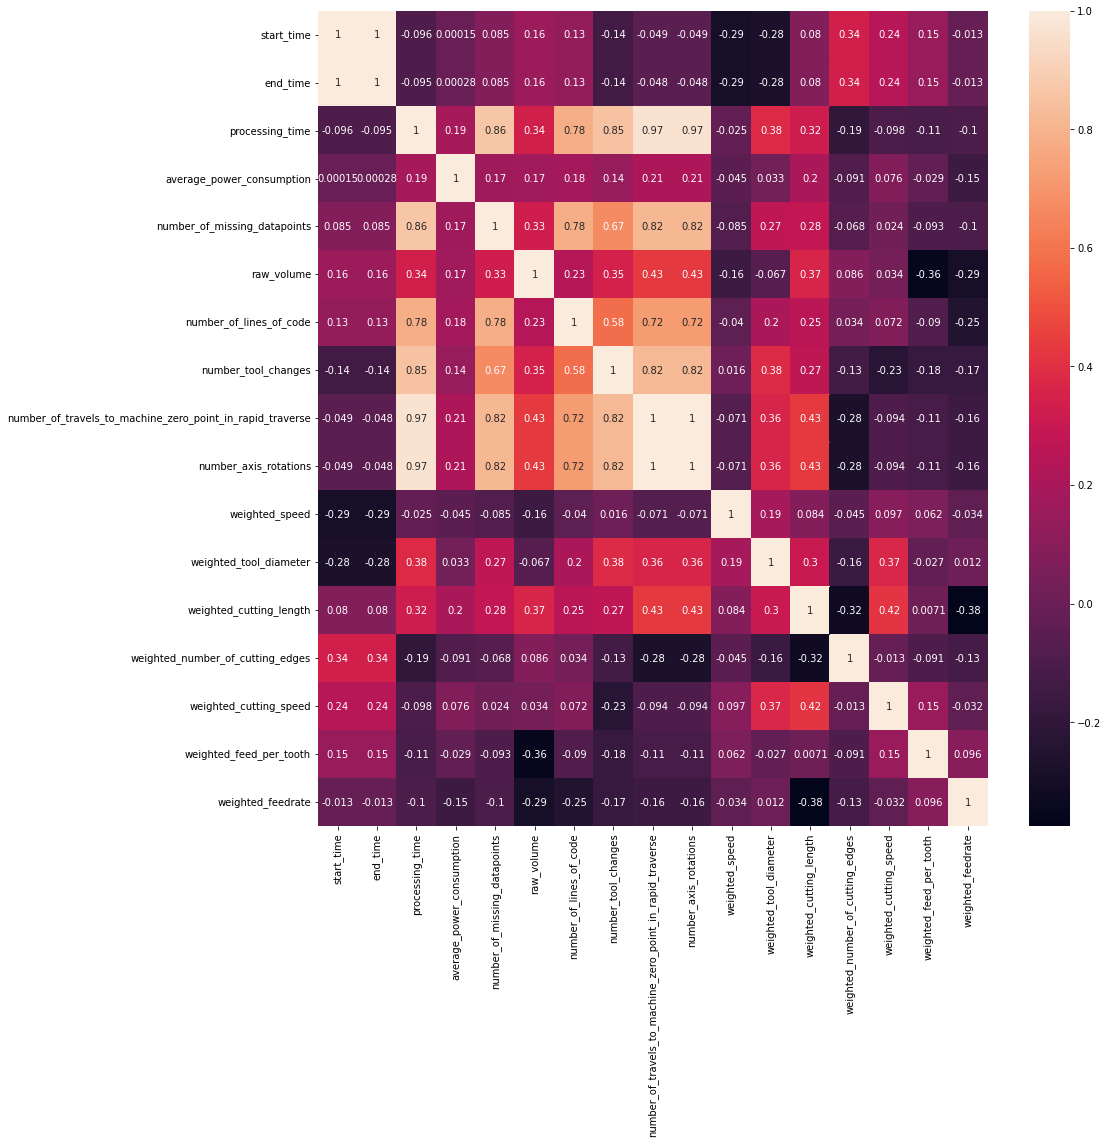

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True) 
plt.show()

Considering the above correlation graph with pearson method (default), we can see that there is low correlation with a lot of the weighted values.

In [ ]:
df.corr().processing_time

start_time                                                  -0.095957
end_time                                                    -0.095305
processing_time                                              1.000000
average_power_consumption                                    0.188783
number_of_missing_datapoints                                 0.863548
raw_volume                                                   0.336831
number_of_lines_of_code                                      0.784716
number_tool_changes                                          0.853962
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.966316
number_axis_rotations                                        0.966316
weighted_speed                                              -0.025400
weighted_tool_diameter                                       0.381967
weighted_cutting_length                                      0.318705
weighted_number_of_cutting_edges                            -0.193324
weighted_cutting_spe

In [ ]:
df.corr().processing_time[df.corr().processing_time > 0.3]

processing_time                                              1.000000
number_of_missing_datapoints                                 0.863548
raw_volume                                                   0.336831
number_of_lines_of_code                                      0.784716
number_tool_changes                                          0.853962
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.966316
number_axis_rotations                                        0.966316
weighted_tool_diameter                                       0.381967
weighted_cutting_length                                      0.318705
Name: processing_time, dtype: float64

In [ ]:
col_processing_time = ['processing_time',
                       'number_of_missing_datapoints',
                      'raw_volume',
                      'number_of_lines_of_code',
                      'number_tool_changes',
                      'number_of_travels_to_machine_zero_point_in_rapid_traverse',
                      'number_axis_rotations',
                       'weighted_tool_diameter',
                      'weighted_cutting_length']

Here we can see that there are high correlation values for predicting processing time such as 'number_of_missing_datapoints','number_of_travels_to_machine_zero_point_in_rapid_traverse','number_axis_rotations'.

The above features can be considered to predict processing time



In [ ]:
df.corr().average_power_consumption

start_time                                                   0.000154
end_time                                                     0.000278
processing_time                                              0.188783
average_power_consumption                                    1.000000
number_of_missing_datapoints                                 0.167220
raw_volume                                                   0.174706
number_of_lines_of_code                                      0.184588
number_tool_changes                                          0.144057
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.212727
number_axis_rotations                                        0.212727
weighted_speed                                              -0.045356
weighted_tool_diameter                                       0.032825
weighted_cutting_length                                      0.202067
weighted_number_of_cutting_edges                            -0.090615
weighted_cutting_spe

on the other hand, average power consumption doesnt really have any strong correlation, positive or negative. 
Lets see if Spearman method gives us any better results?

In [ ]:
df.corr(method='spearman').average_power_consumption

start_time                                                  -0.125936
end_time                                                    -0.125936
processing_time                                              0.392470
average_power_consumption                                    1.000000
number_of_missing_datapoints                                 0.257037
raw_volume                                                   0.284420
number_of_lines_of_code                                      0.352183
number_tool_changes                                          0.231078
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.379675
number_axis_rotations                                        0.379675
weighted_speed                                              -0.089198
weighted_tool_diameter                                       0.126745
weighted_cutting_length                                      0.282016
weighted_number_of_cutting_edges                            -0.301392
weighted_cutting_spe

Once we use spearman, we can see moderate correalation from a lot of features now which can be valuable candidates for predicting the average power consumption

In [ ]:
df.corr(method='spearman').average_power_consumption[df.corr(method='spearman').average_power_consumption < -0.25]

weighted_number_of_cutting_edges   -0.301392
Name: average_power_consumption, dtype: float64

In [ ]:
df.corr(method='spearman').average_power_consumption[df.corr(method='spearman').average_power_consumption > 0.25]

processing_time                                              0.392470
average_power_consumption                                    1.000000
number_of_missing_datapoints                                 0.257037
raw_volume                                                   0.284420
number_of_lines_of_code                                      0.352183
number_of_travels_to_machine_zero_point_in_rapid_traverse    0.379675
number_axis_rotations                                        0.379675
weighted_cutting_length                                      0.282016
Name: average_power_consumption, dtype: float64

In [ ]:
col_avg_pwr_c=['weighted_number_of_cutting_edges',
              'processing_time',
              'average_power_consumption',
              'raw_volume',
              'number_of_lines_of_code',
              'number_of_travels_to_machine_zero_point_in_rapid_traverse',
              'number_axis_rotations',
              'weighted_cutting_length']

The above features can be considered to predict power consumption

# Some EDA

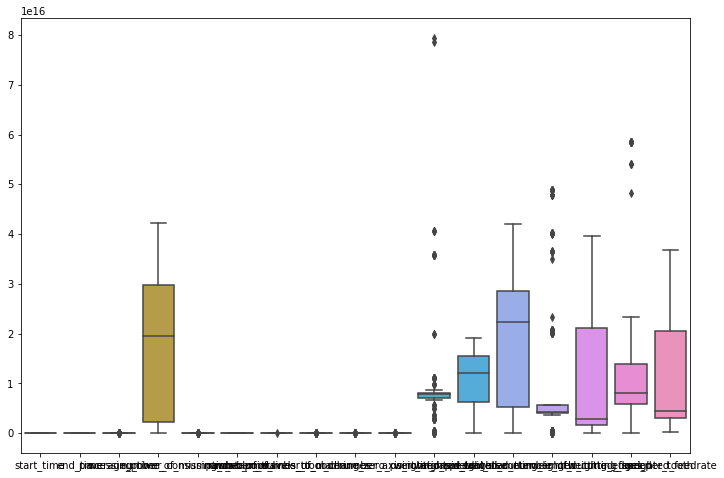

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

<Figure size 864x576 with 0 Axes>

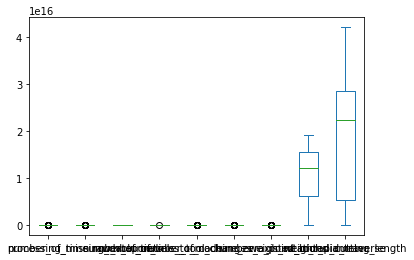

In [ ]:
plt.figure(figsize=(12,8))
df[col_processing_time].plot.box()

<Figure size 864x576 with 0 Axes>

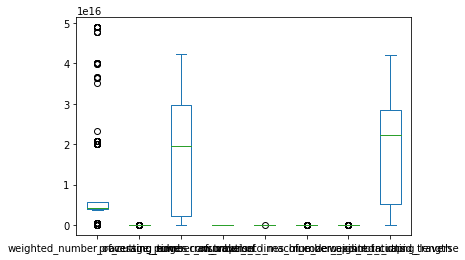

In [ ]:
plt.figure(figsize=(12,8))
df[col_avg_pwr_c].plot.box()

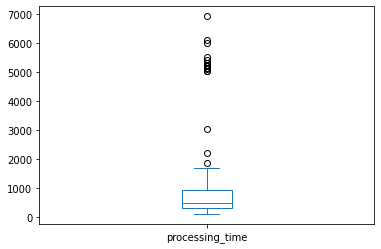

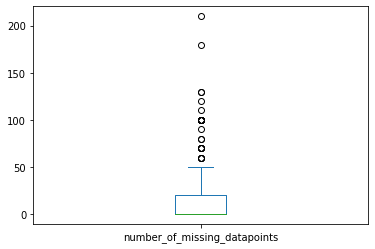

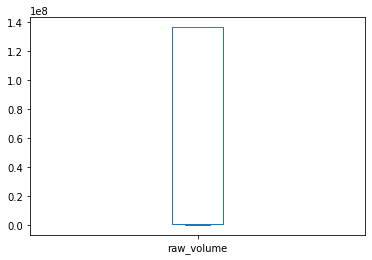

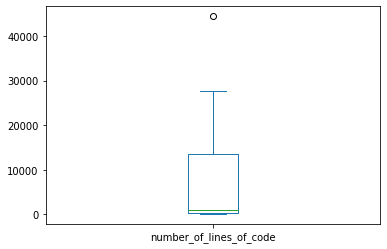

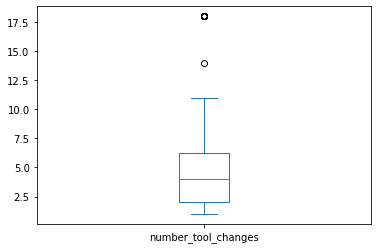

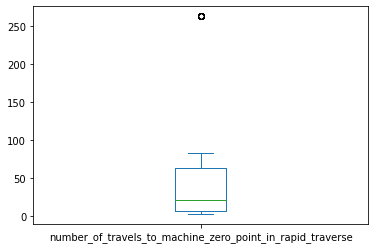

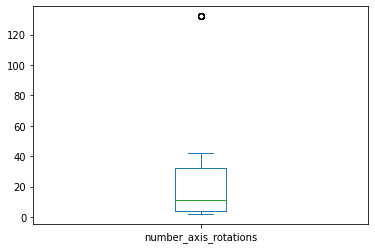

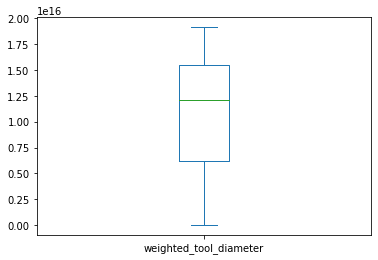

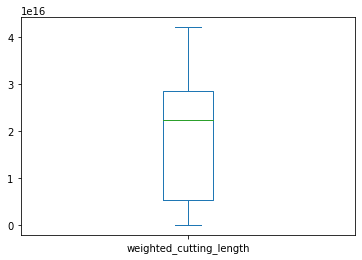

In [ ]:
for i in col_processing_time:
    plt.figure()
    df[i].plot.box()

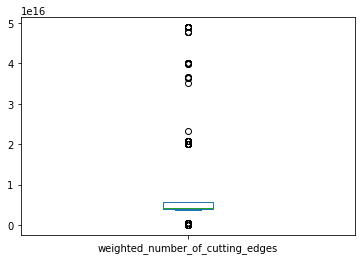

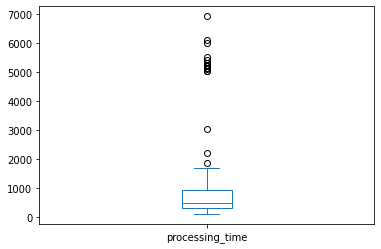

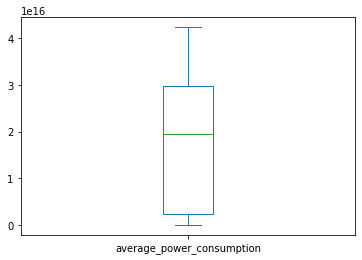

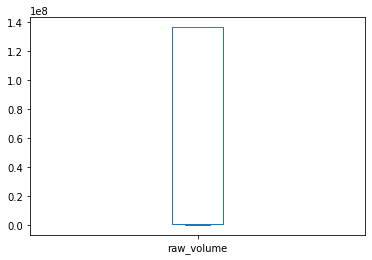

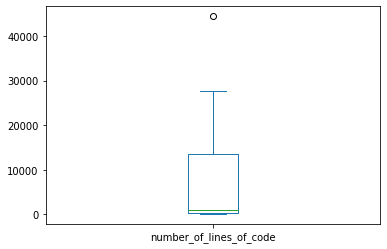

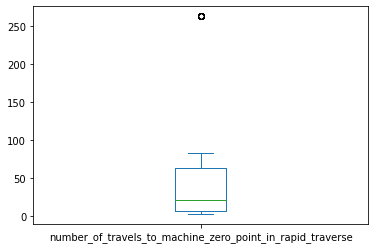

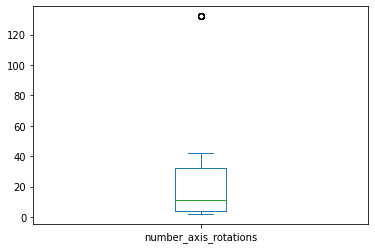

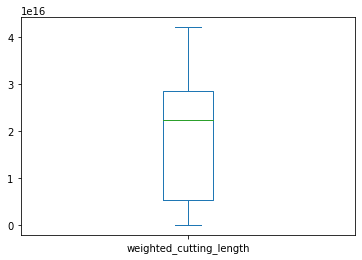

In [ ]:
for i in col_avg_pwr_c:
    plt.figure()
    df[i].plot.box()

The above box plot graph shows the Q1 to Q3 distribution as well as the outliers of the data. The green line the is Q2 or the median part of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff325d53950>,
      dtype=object)

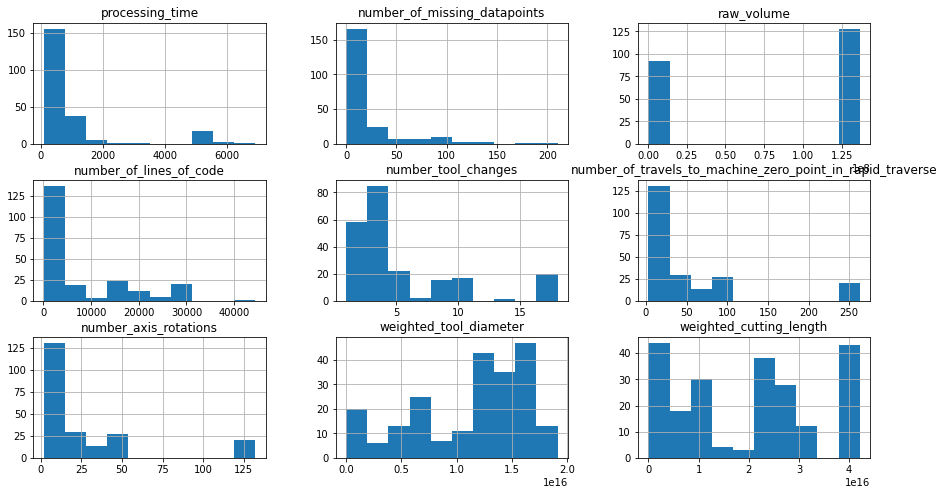

In [ ]:
df.hist(column=col_processing_time,figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff325ba6fd0>,
      dtype=object)

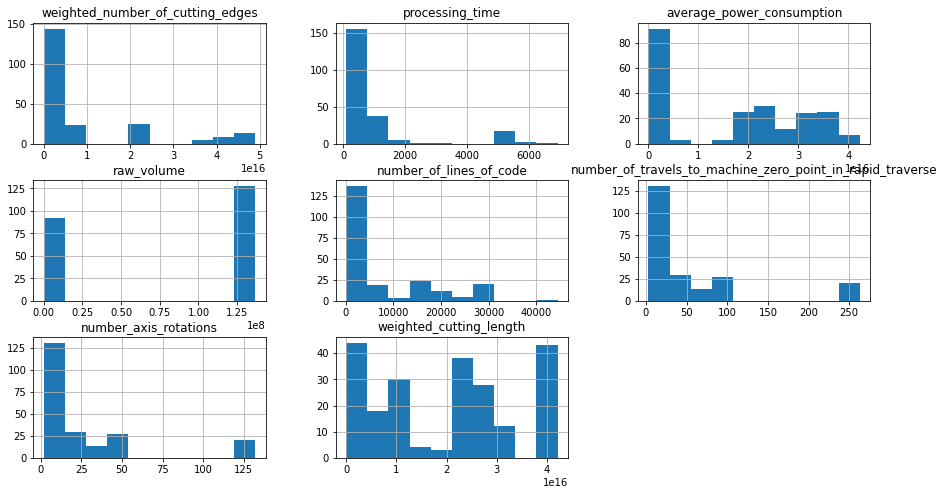

In [ ]:
df.hist(column=col_avg_pwr_c,figsize=(15,8))

# Model Training

In [ ]:
df_pwr = df[col_avg_pwr_c]
df_pt = df[col_processing_time]
y_pt = df_pt['processing_time']
y_pwr = df_pwr['average_power_consumption']
X_pt =df_pt.drop(['processing_time'],axis=1)
X_pwr =df_pwr.drop(['average_power_consumption'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler



In [ ]:
sc_x = StandardScaler()

In [ ]:
Xpt = sc_x.fit_transform(X_pt)
Xpwr = sc_x.fit_transform(X_pwr)

# SVM - Processing Time

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xpt,y_pt, test_size = 0.3, random_state = 65)

In [ ]:
svc = SVC(degree = 2 )

In [ ]:
svc.fit(X_train,y_train)

SVC(degree=2)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
y_pred

array([1300,  750,  210,  100,  120,  470, 1300,  100, 5300,  750,  590,
       1250,  470,  100,  100,  150,  420, 5300,  470, 1300,  470,  470,
        420,  150,  210,  210, 5300,  100,  100, 5300,  420,  470,  100,
       5300, 5300,  470,  590,  750,  120,  150, 1300,  150,  470,  210,
        150,  750,  150,  100,  590,  420, 6100,  750, 1300,  100, 5300,
        100,  420, 1300, 1300,  100,  100, 5300,  210,  470,  420,  100])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test, y_pred,squared=False) #RMSE 

341.7468494235303

In [ ]:
mean_squared_error(y_test,y_pred,squared=True) #MSE

116790.90909090909

In [ ]:
r2_score(y_test, y_pred)

0.9561689408078166

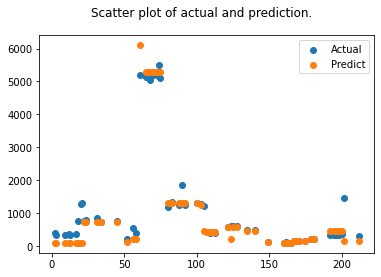

In [ ]:
df_plot = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred}, index=y_test.index)
fig, axe = plt.subplots()
fig.suptitle("Scatter plot of actual and prediction.")
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_test'], label='Actual')
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predict')
axe.legend()
plt.show()

# Random Forest - Processing Time

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 5, random_state = 18)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', random_state=18)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred,squared=False) #RMSE

167.3581914175664

In [ ]:
mean_squared_error(y_test, y_pred,squared=True) #MSE

28008.764234558796

In [ ]:
r2_score(y_test,y_pred)

0.9894884472377105

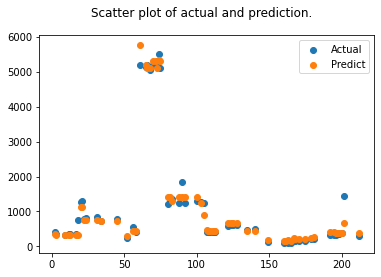

In [ ]:
df_plot = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred}, index=y_test.index)
fig, axe = plt.subplots()
fig.suptitle("Scatter plot of actual and prediction.")
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_test'], label='Actual')
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predict')
axe.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

CV_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'random_state': [18]})

In [ ]:
y_pred=CV_rf.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred,squared=False) #RMSE

164.82322167891857

In [ ]:
mean_squared_error(y_test, y_pred,squared=True) #MSE

27166.69440461793

In [ ]:
r2_score(y_test,y_pred)

0.989804471942436

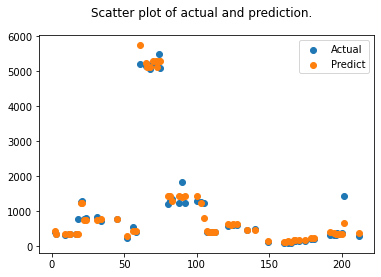

In [ ]:
df_plot = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred}, index=y_test.index)
fig, axe = plt.subplots()
fig.suptitle("Scatter plot of actual and prediction.")
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_test'], label='Actual')
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predict')
axe.legend()
plt.show()

# SVM - Average Power Consumption

1.   List item
2.   List item



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xpwr,y_pwr, test_size = 0.3, random_state = 65)

In [ ]:
svc = SVC(degree = 2 )

In [ ]:
svc.fit(X_train,y_train)

SVC(degree=2)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred,squared=False) #RMSE

1.8435902678064412e+16

In [ ]:
mean_squared_error(y_test, y_pred,squared=True) #MSE

3.3988250755506255e+32

In [ ]:
r2_score(y_test,y_pred)

-0.8294262626743998

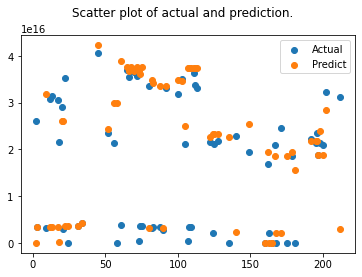

In [ ]:
df_plot = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred}, index=y_test.index)
fig, axe = plt.subplots()
fig.suptitle("Scatter plot of actual and prediction.")
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_test'], label='Actual')
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predict')
axe.legend()
plt.show()

# Random Forest - Average Power Consumption

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 5, random_state = 18)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred,squared=False) #RMSE

1.3830563210281434e+16

In [ ]:
mean_squared_error(y_test, y_pred,squared=True) #MSE

1.912844787135903e+32

In [ ]:
r2_score(y_test,y_pred)

-0.029593583729613515

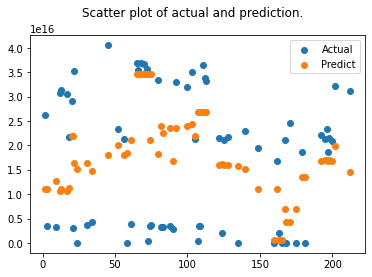

In [ ]:
df_plot = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred}, index=y_test.index)
fig, axe = plt.subplots()
fig.suptitle("Scatter plot of actual and prediction.")
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_test'], label='Actual')
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predict')
axe.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

CV_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'random_state': [18]})

In [ ]:
y_pred=CV_rf.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred,squared=False) #RMSE

1.3535241588596768e+16

In [ ]:
mean_squared_error(y_test, y_pred,squared=True) #MSE

1.8320276486167953e+32

In [ ]:
r2_score(y_test,y_pred)

0.013906447132403854

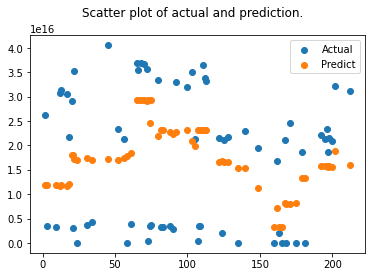

In [ ]:
df_plot = pd.DataFrame({'y_test': (y_test).to_list(), 'y_pred': y_pred}, index=y_test.index)
fig, axe = plt.subplots()
fig.suptitle("Scatter plot of actual and prediction.")
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_test'], label='Actual')
axe.scatter(x=df_plot.index.to_list(), y=df_plot['y_pred'], label='Predict')
axe.legend()
plt.show()

# ------------------------------------------